## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIMI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://datascience.unimi.it"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Data Science Research Center (DSRC) – Università degli Studi di Milano


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url2= lista_url[3:8]
lista_url2

['https://datascience.unimi.it/',
 'https://datascience.unimi.it/?page_id=101',
 'https://datascience.unimi.it/?page_id=87',
 'https://datascience.unimi.it/?page_id=136',
 'https://datascience.unimi.it/?page_id=90']

In [4]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Data Science Research Center (DSRC) – Università degli Studi di Milano',
 'Blog – Data Science Research Center (DSRC)',
 'Scientific Committee and members – Data Science Research Center (DSRC)',
 'Skills & Expertise – Data Science Research Center (DSRC)',
 'Contacts – Data Science Research Center (DSRC)']

In [5]:
print(texts[1])




Blog





Posted on 25 October 202025 October 2020COVER – COVid-19 Empirical Research 

Friday,  October 30, 2020 at 10:00 hrs (CET).
We are happy to announce the video conference 
COVER – COVid-19 Empirical Research 
organized by the Center of Excellence in Economics and Data Science of the Department of Economics, Management and Quantitative Methods and by the Data Science Research Center, Università degli Studi di Milano, Italy
Session 1: Covid-19 Effects On SocietySession 2: Society Determinants Of Covid-19Session 3: Covid-19 Modeling And Surveying
Click here for the detailed programme.
Participation is free and open to everybody, up to a maximum of 300 partecipants. This is the Zoom link.




Posted on 2 December 20192 December 2019DSRC representatives participated to the ICAIH 2019 Conference 

During the conference ICAIH 2019 (1st Industrial Conference on Artificial Intelligence and Health), held in Milano, Palazzo Pirelli, on November 13 and 14, 2019, a round table on the su

### TEXT CLEANING

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

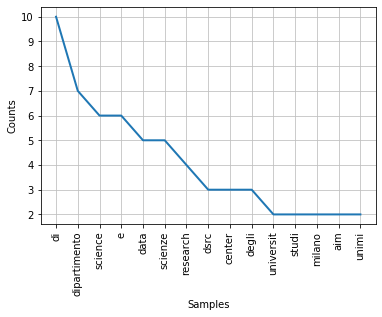

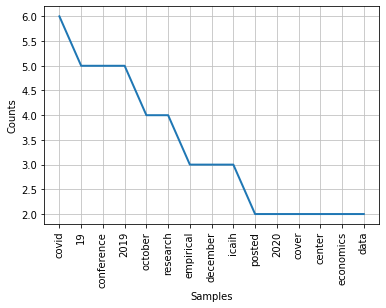

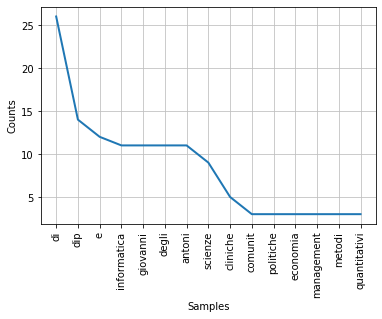

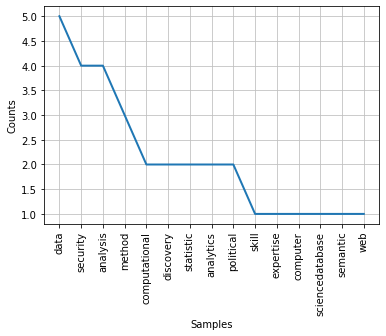

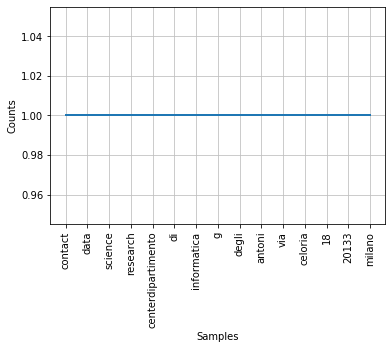

In [8]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale
Frequenza (F) <br>
* Più volte due parole x e y co-occorrono più il loro grado di associazione è alto
* Prende in considerazione il comportamento delle parole nel testo
* Problema: parole molto frequenti hanno grado di associazione più alto rispetto a parole poco frequenti !!

F= #occorrenze della co-occorrenza xy in un corpus / # occorrenze totale di tutte le parole di un corpus


In [9]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [ ]:
stopwords = ['di', 'e', 'degli', 'dip', 'antoni', 'giovanni', 'dipartimento', 'diniche']
querywords = tot_text.split()

resultwords  = [word for word in tot_text if word.lower() not in stopwords]
tot_text = ' '.join(tot_text)

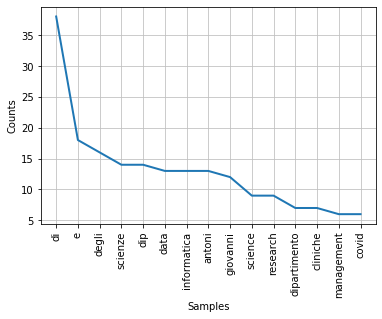

In [10]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

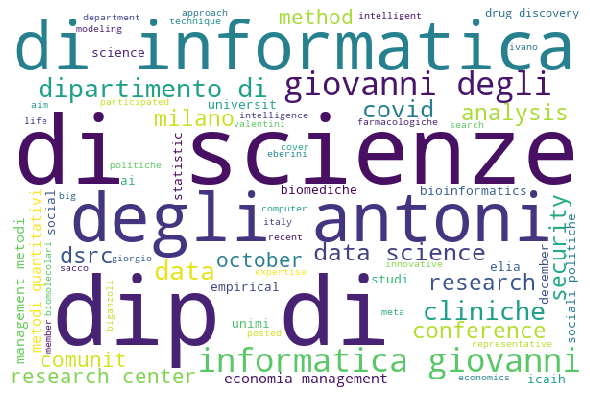

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Mutual information fra parola e centro di ricerca

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html <br>
https://stackoverflow.com/questions/20018730/computing-pointwise-mutual-information-of-a-text-document-using-python <br>

Pointwise Mutual Information (I) (PMI) <br>
* Due parole x e y che co-occorrono spesso rispetto alle loro occorrenze in un corpus D, hanno un alto grado di associazione
* Vantaggio rispetto a F: Due parole che co-occorrono spesso ma che sono molto frequenti hanno associazione minore rispetto a parole che co-occorrono lo stesso numero di volte ma che sono meno frequenti

(PMI)=log[p(x,y)/p(x)p(y)]

In [11]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [12]:
a1=tot_text.split() #divido ogni parola   
a2=collections.Counter(a1) #Counter({'dsrc': 5,'data': 13,...}) mi conta la freq sul totale
a3=collections.Counter(bigrams(a1)) # Counter({('dsrc', 'data'): 1,('data', 'science'): 6,...])
                                    #possibili coppie di parole e la loro freq
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} #freq parola sul totale
a7={x:float(a3[x])/a5 for x in a3} #freq coppie sul totale
u = []
#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2)
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'dsrc': 6.9402},
 {'data': 5.5617},
 {'science': 6.0922},
 {'research': 6.0922},
 {'center': 6.9402},
 {'coordinate': 9.2621},
 {'universit': 7.6771},
 {'degli': 5.2621},
 {'studi': 7.6771},
 {'di': 4.0142},
 {'milano': 6.9402},
 {'whose': 9.2621},
 {'member': 8.2621},
 {'come': 9.2621},
 {'7': 9.2621},
 {'department': 8.2621},
 {'primary': 9.2621},
 {'aim': 8.2621},
 {'integrate': 9.2621},
 {'expertise': 8.2621},
 {'activity': 9.2621},
 {'computer': 8.2621},
 {'statistic': 7.6771},
 {'mathematics': 9.2621},
 {'unimi': 7.6771},
 {'towards': 9.2621},
 {'modern': 9.2621},
 {'innovative': 8.2621},
 {'approach': 8.2621},
 {'intelligent': 8.2621},
 {'process': 9.2621},
 {'based': 9.2621},
 {'analysis': 6.9402},
 {'heterogeneous': 9.2621},
 {'big': 8.2621},
 {'specifically': 9.2621},
 {'foster': 9.2621},
 {'centrality': 9.2621},
 {'common': 9.2621},
 {'unifying': 9.2621},
 {'cultural': 9.2621},
 {'scientific': 9.2621},
 {'social': 7.6771},
 {'challenge': 9.2621},
 {'upcoming': 9.2621},
 {'

In [ ]:
mo=[(l,k) for k,l in sorted([(j,i) for i,j in a2.items()], reverse=True)]
bi=[(l,k) for k,l in sorted([(j,i) for i,j in a3.items()], reverse=True)]

a2_1= mo[:15]
a3_1= bi[:15]

In [13]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'di': 4.0142},
 {'e': 5.0922},
 {'degli': 5.2621},
 {'scienze': 5.4547},
 {'dip': 5.4547},
 {'scienze': 5.4547},
 {'dip': 5.4547},
 {'data': 5.5617},
 {'informatica': 5.5617},
 {'antoni': 5.5617},
 {'data': 5.5617},
 {'informatica': 5.5617},
 {'antoni': 5.5617},
 {'data': 5.5617},
 {'informatica': 5.5617},
 {'antoni': 5.5617},
 {'giovanni': 5.6771},
 {'science': 6.0922},
 {'research': 6.0922},
 {'science': 6.0922},
 {'research': 6.0922},
 {'dipartimento': 6.4547},
 {'cliniche': 6.4547},
 {'dipartimento': 6.4547},
 {'cliniche': 6.4547},
 {'management': 6.6771},
 {'covid': 6.6771},
 {'management': 6.6771},
 {'covid': 6.6771},
 {'dsrc': 6.9402},
 {'center': 6.9402},
 {'milano': 6.9402},
 {'analysis': 6.9402},
 {'security': 6.9402},
 {'politiche': 6.9402},
 {'19': 6.9402},
 {'conference': 6.9402},
 {'2019': 6.9402},
 {'dsrc': 6.9402},
 {'center': 6.9402},
 {'milano': 6.9402},
 {'analysis': 6.9402},
 {'security': 6.9402},
 {'politiche': 6.9402},
 {'19': 6.9402},
 {'conference': 6.9402},
 

In [ ]:
Lista1_dict = {list(d.keys())[0]: list(d.values())[0] for d in u}
Lista1_dict = {k: v for k, v in sorted(Lista1_dict.items(), key=lambda item: item[1])}

type(Lista1_dict)
n = 2
{key: Lista1_dict[key] for key in sorted(Lista1_dict, key=Lista1_dict.get, reverse=False)[:n]}

In [ ]:
a=tot_text

a1=a.split() 
a2=collections.Counter(a1)

a3=collections.Counter(bigrams(a1))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = {}
v = {}
for x in a6:
    k={x:round(math.log((a7[b]/(a6[x] * a6[y])),2),4) for b in a7 for y in a6 if x and y in b}
    u[x] = k[x]
    k={x:round(math.log((a7[b]/(a6[x] * a6[y])),2),4) for b in a7 for y in a6 if x in b and y in b}
    v[x] = k[x]

u
v